In [2]:
import sys
!"{sys.executable}" -m pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 12.4 MB/s eta 0:00:00


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import ydata_profiling as pp
import seaborn as sns
from datetime import datetime
# from scipy.stats import pearsonr, spearmanr, kendalltau
import statsmodels.api as sm
import phik
import warnings
import os

In [4]:
import warnings
from google.colab import files
uploaded = files.upload()


Saving CPI & factors dataset (new).csv to CPI & factors dataset (new).csv


In [5]:
cpi = pd.read_csv('CPI & factors dataset (new).csv')


In [6]:
# Check the head and tail to see the format is same
print(cpi.head())
print(cpi.tail())

# Get the information of the dataset
print(cpi.info())


   Year Period     Label   CPI  Unemployment rate  Federal Fund rate  \
0  1980    M01  1980 Jan  77.8                6.9              13.82   
1  1980    M02  1980 Feb  78.9                6.8              14.13   
2  1980    M03  1980 Mar  80.1                6.6              17.19   
3  1980    M04  1980 Apr  81.0                6.7              17.61   
4  1980    M05  1980 May  81.8                7.1              10.98   

   USD to UKP   PPI  
0      2.2641  85.2  
1      2.2891  86.9  
2      2.2045  87.5  
3      2.2094  87.8  
4      2.3020  88.3  
     Year Period     Label      CPI  Unemployment rate  Federal Fund rate  \
519  2023    M04  2023 Apr  303.363                3.1               4.83   
520  2023    M05  2023 May  304.127                3.4               5.06   
521  2023    M06  2023 Jun  305.109                3.8               5.08   
522  2023    M07  2023 Jul  305.691                3.8               5.12   
523  2023    M08  2023 Aug  307.026               

In [7]:
# Get the basic statistic information of the dataset
data_describe = cpi.drop(columns=['Year'])
print(data_describe.describe())

              CPI  Unemployment rate  Federal Fund rate  USD to UKP  \
count  524.000000         524.000000         524.000000  524.000000   
mean   180.399910           6.126527           4.400916    1.595024   
std     57.472991           1.823241           4.013926    0.236168   
min     77.800000           3.100000           0.050000    1.093100   
25%    133.800000           4.800000           0.977500    1.440875   
50%    177.700000           5.700000           4.080000    1.578050   
75%    230.235750           7.200000           6.447500    1.705475   
max    307.026000          14.400000          19.100000    2.416500   

              PPI  
count  524.000000  
mean   151.204183  
std     44.683313  
min     85.200000  
25%    116.075000  
50%    133.350000  
75%    191.925000  
max    280.251000  


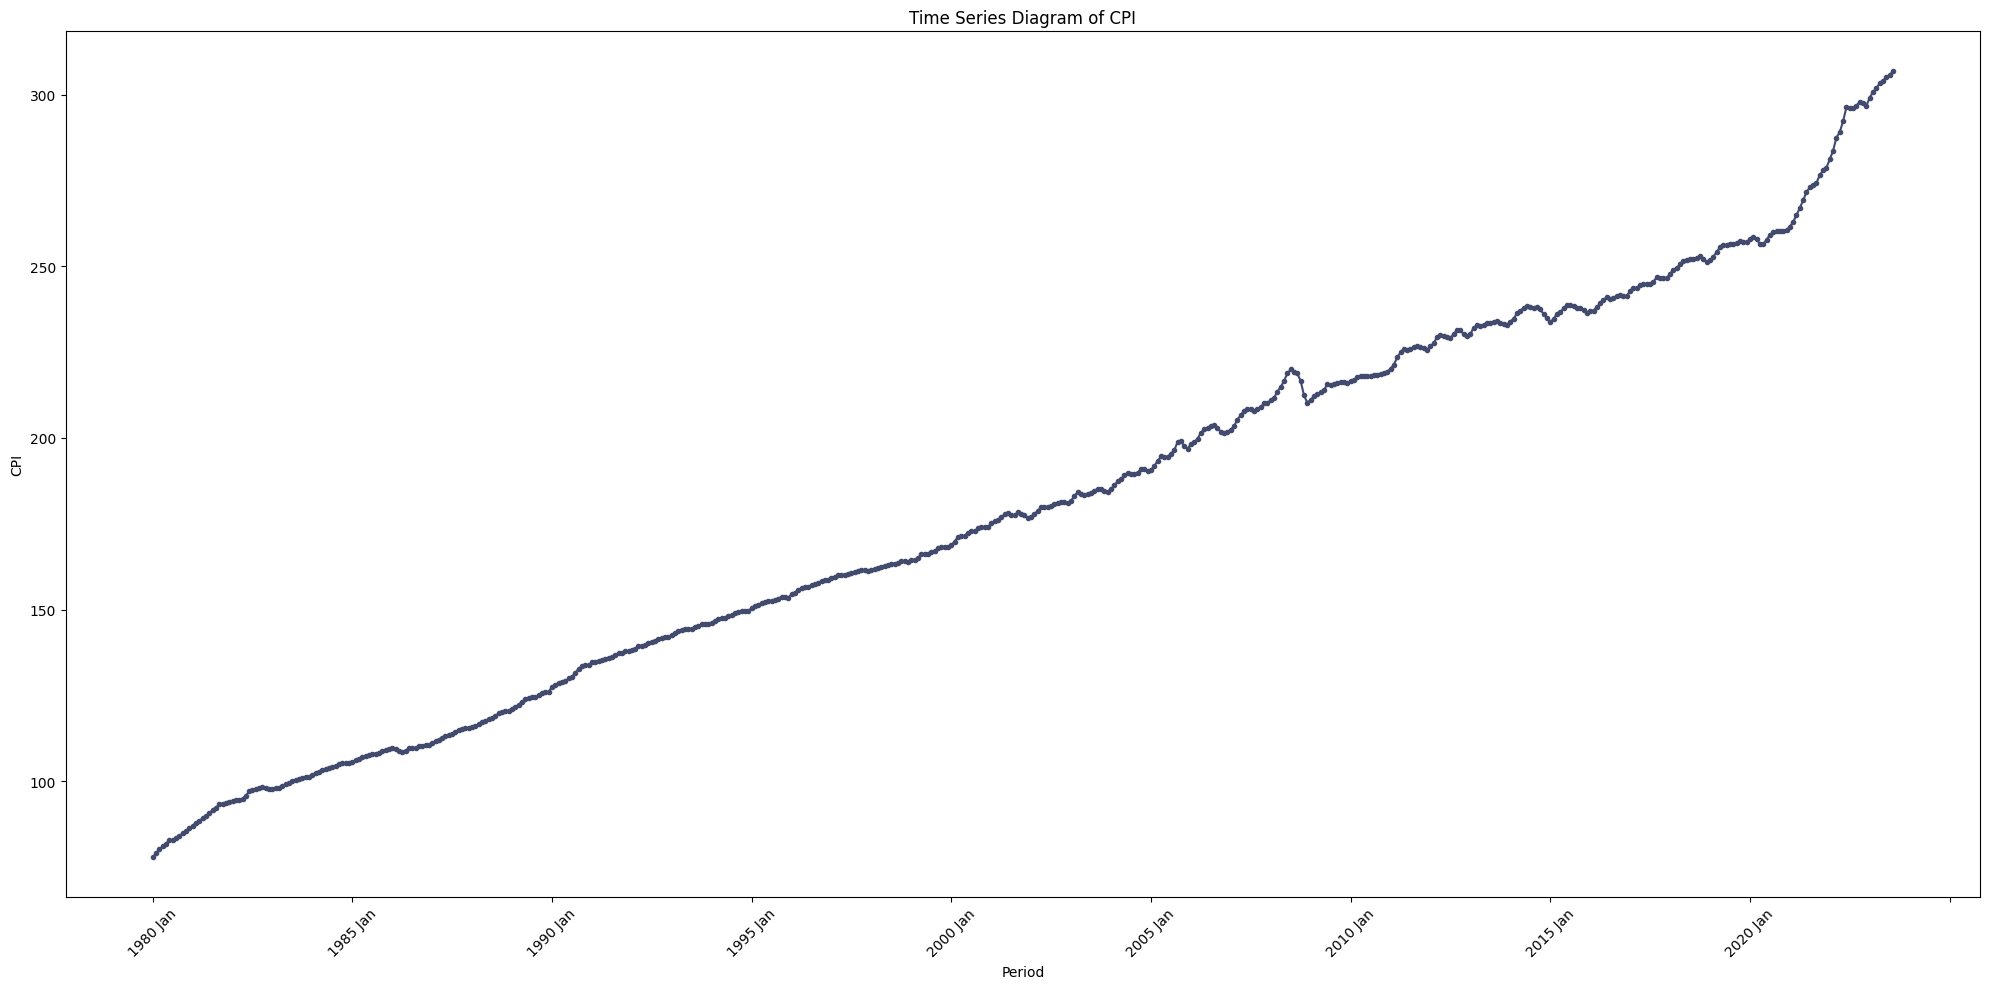

Text(0, 0.5, 'Frequency')

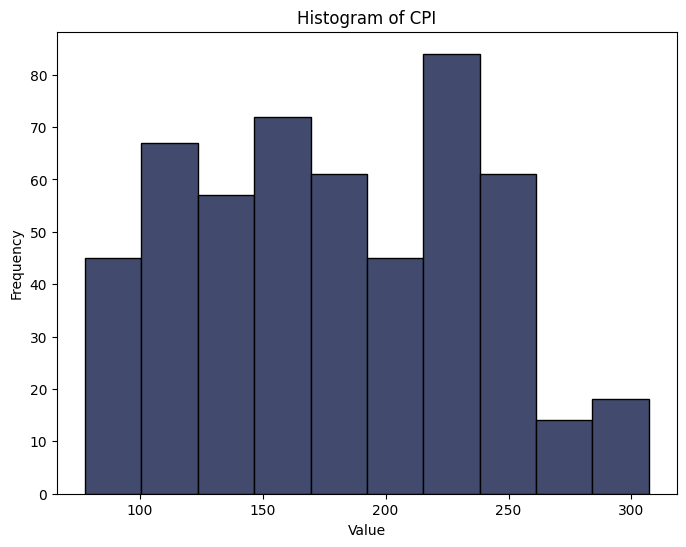

In [8]:
# Plot the Time Series Diagram & Frequency Chart

# Transfer the period from  "1989 Dec" to date format then to '1989/12
# cpi['Label'] = pd.to_datetime(cpi['Label'], format='%Y %b')
# cpi['Label'] = cpi['Label'].dt.strftime('%Y/%m')


# Set the size of plot frame
plt.figure(figsize=(20, 10))

# Plot the Time Seires Diagram of CPI
plt.plot(cpi['Label'], cpi['CPI'], label='CPI', marker='.', linestyle='-', color='#424b6e',linewidth=1.5)
plt.xlabel('Period')
plt.ylabel('CPI')
plt.title('Time Series Diagram of CPI')

# Set the interval of the x-axis , ratate it to avoid overlap
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Show the diagram
plt.tight_layout()
plt.show()

# Frequency Chart
plt.figure(figsize=(8, 6))
plt.hist(cpi['CPI'], bins=10, color = '#424b6e' ,edgecolor='k')
plt.title('Histogram of CPI')
plt.xlabel('Value')
plt.ylabel('Frequency')

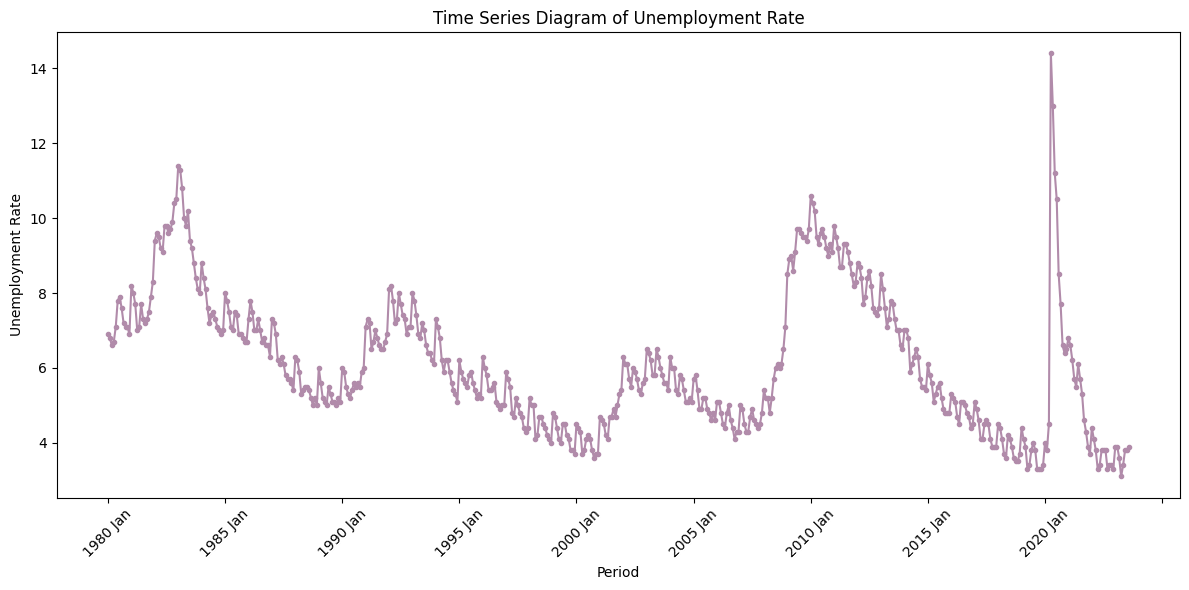

Text(0, 0.5, 'Frequency')

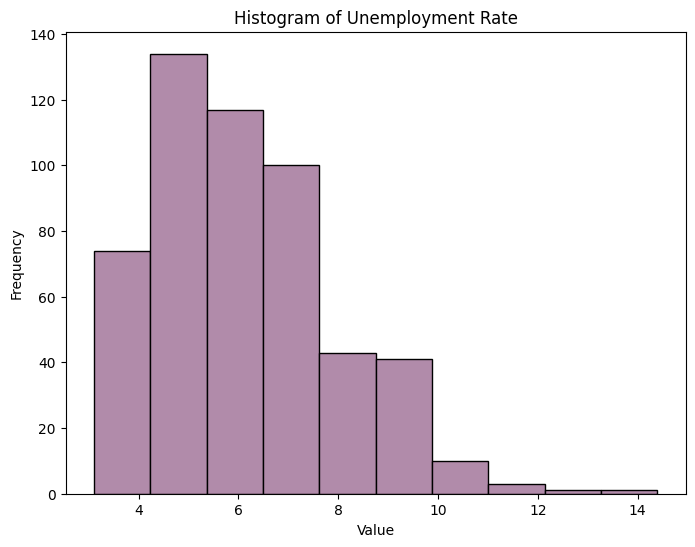

In [9]:
# Set the size of plot frame
plt.figure(figsize=(12, 6))

# Plot the Time Series Diagram of Unemployment rate
plt.plot(cpi['Label'], cpi['Unemployment rate'], label='Unemployment rate', marker='.', linestyle='-', color='#b18baa',linewidth=1.5)
plt.xlabel('Period')
plt.ylabel('Unemployment Rate')
plt.title('Time Series Diagram of Unemployment Rate')

# Set the interval of the x-axis , ratate it to avoid overlap
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Show the diagram
plt.tight_layout()
plt.show()

# Frequency Chart
plt.figure(figsize=(8, 6))
plt.hist(cpi['Unemployment rate'], bins=10, color = '#b18baa' ,edgecolor='k')
plt.title('Histogram of Unemployment Rate')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

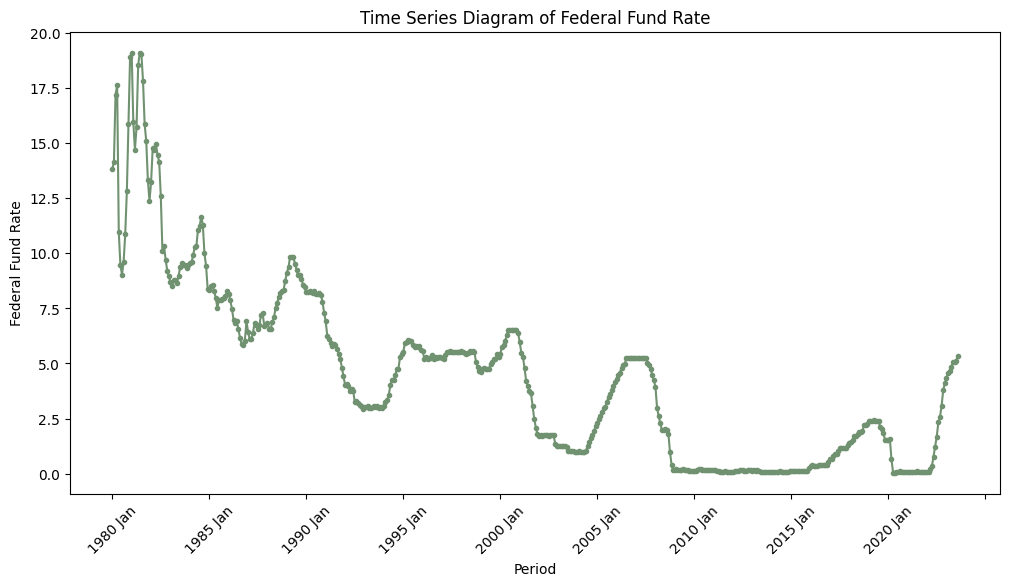

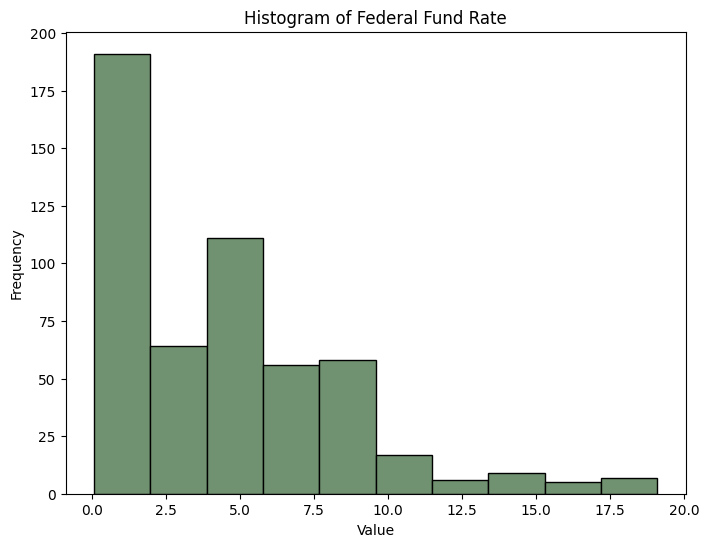

In [10]:
# Plot the Time Series Diagram of Federal Fund rate

# Set the size of plot frame
plt.figure(figsize=(12, 6))

plt.plot(cpi['Label'], cpi['Federal Fund rate'], label='Federal Fund rate', marker='.', linestyle='-', color='#719271')
plt.xlabel('Period')
plt.ylabel('Federal Fund Rate')
plt.title('Time Series Diagram of Federal Fund Rate')

# Set the interval of the x-axis , ratate it to avoid overlap
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# # Show the diagram
# plt.tight_layout()
# plt.show()

# Frequency Chart
plt.figure(figsize=(8, 6))
plt.hist(cpi['Federal Fund rate'], bins=10, color = '#719271' ,edgecolor='k')
plt.title('Histogram of Federal Fund Rate')
plt.xlabel('Value')
plt.ylabel('Frequency')


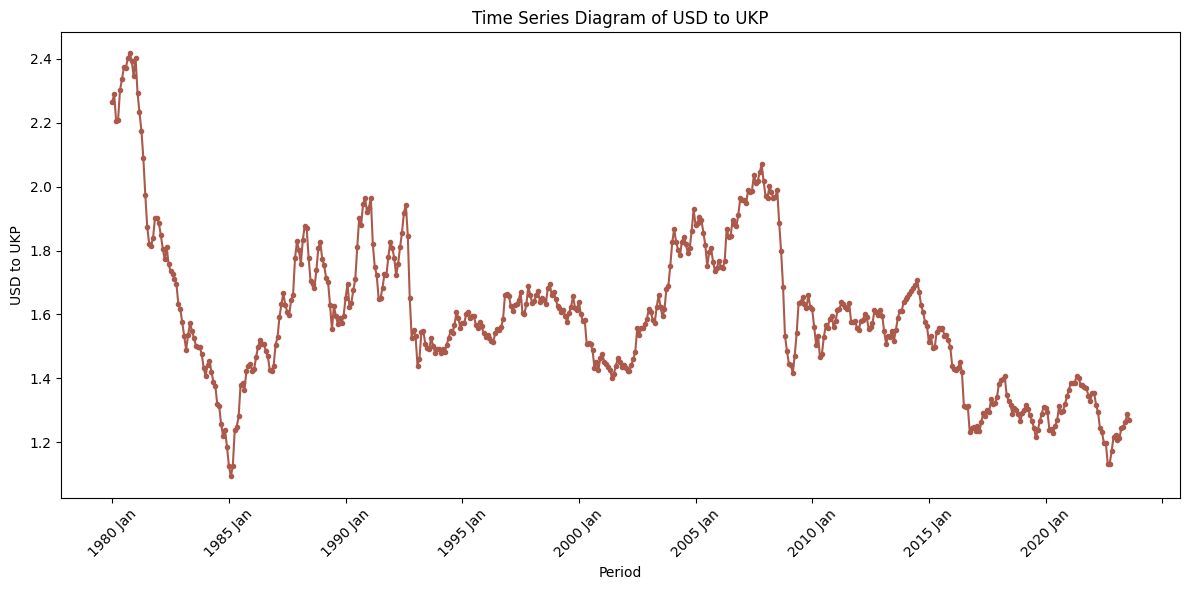

Text(0, 0.5, 'Frequency')

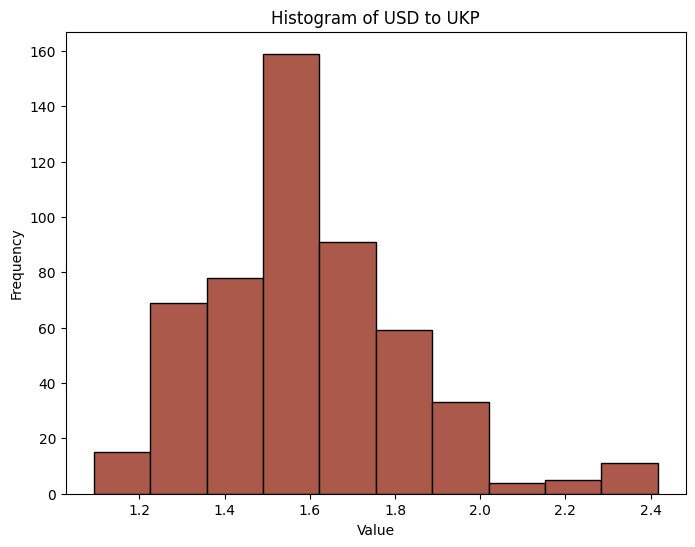

In [11]:
# Set the size of plot frame
plt.figure(figsize=(12, 6))

# Plot the Time Series Diagram of USD to UKP
plt.plot(cpi['Label'], cpi['USD to UKP'], label='USD to UKP', marker='.', linestyle='-', color='#ab594b',linewidth=1.5)
plt.xlabel('Period')
plt.ylabel('USD to UKP')
plt.title('Time Series Diagram of USD to UKP')

# Set the interval of the x-axis , ratate it to avoid overlap
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Show the diagram
plt.tight_layout()
plt.show()

# Frequency Chart
plt.figure(figsize=(8, 6))
plt.hist(cpi['USD to UKP'], bins=10, color = '#ab594b' ,edgecolor='k')
plt.title('Histogram of USD to UKP')
plt.xlabel('Value')
plt.ylabel('Frequency')

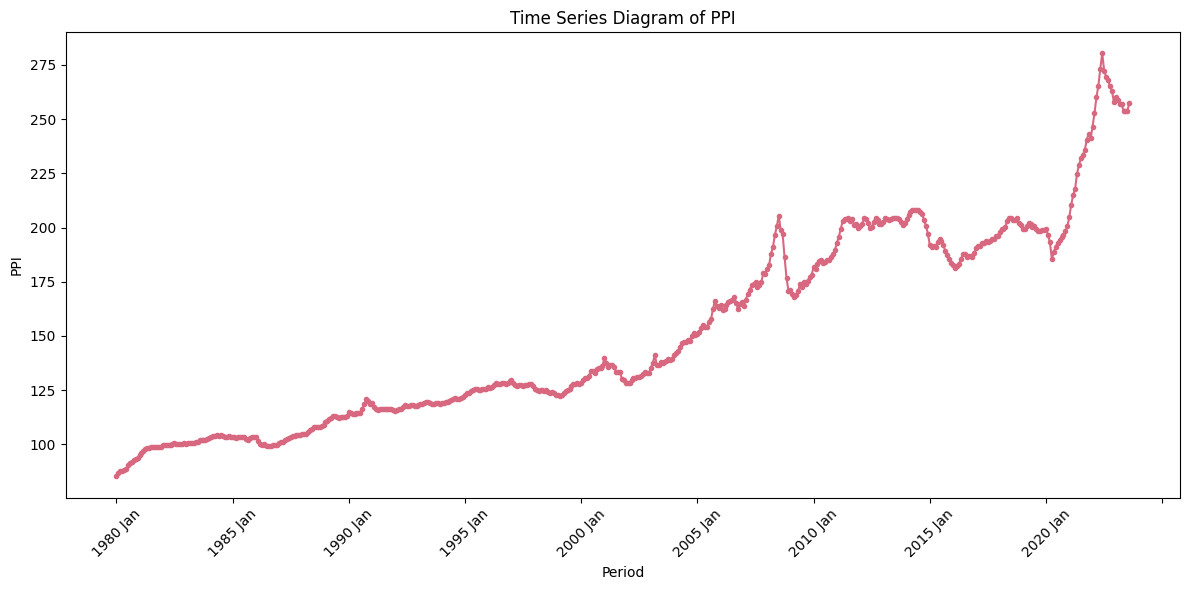

Text(0, 0.5, 'Frequency')

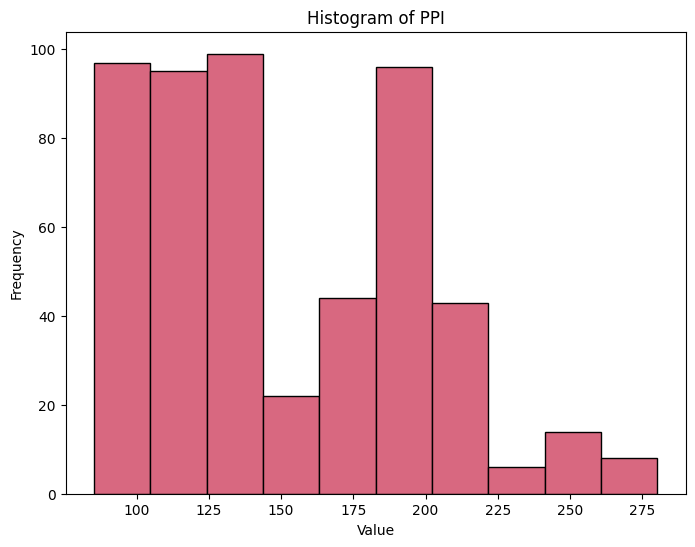

In [12]:
# Set the size of plot frame
plt.figure(figsize=(12, 6))

# Plot the Time Series Diagram of PPI
plt.plot(cpi['Label'], cpi['PPI'], label='PPI', marker='.', linestyle='-', color='#d86880',linewidth=1.5)
plt.xlabel('Period')
plt.ylabel('PPI')
plt.title('Time Series Diagram of PPI')

# Set the interval of the x-axis , ratate it to avoid overlap
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Show the diagram
plt.tight_layout()
plt.show()

# Frequency Chart
plt.figure(figsize=(8, 6))
plt.hist(cpi['PPI'], bins=10, color = '#d86880' ,edgecolor='k')
plt.title('Histogram of PPI')
plt.xlabel('Value')
plt.ylabel('Frequency')

<Figure size 1200x600 with 0 Axes>

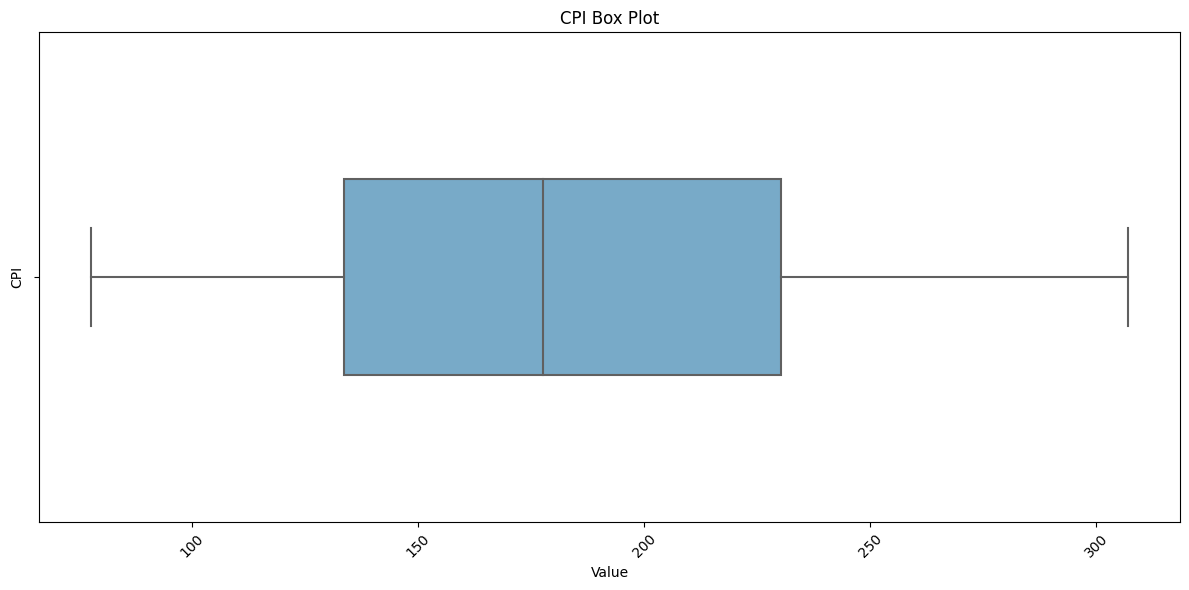

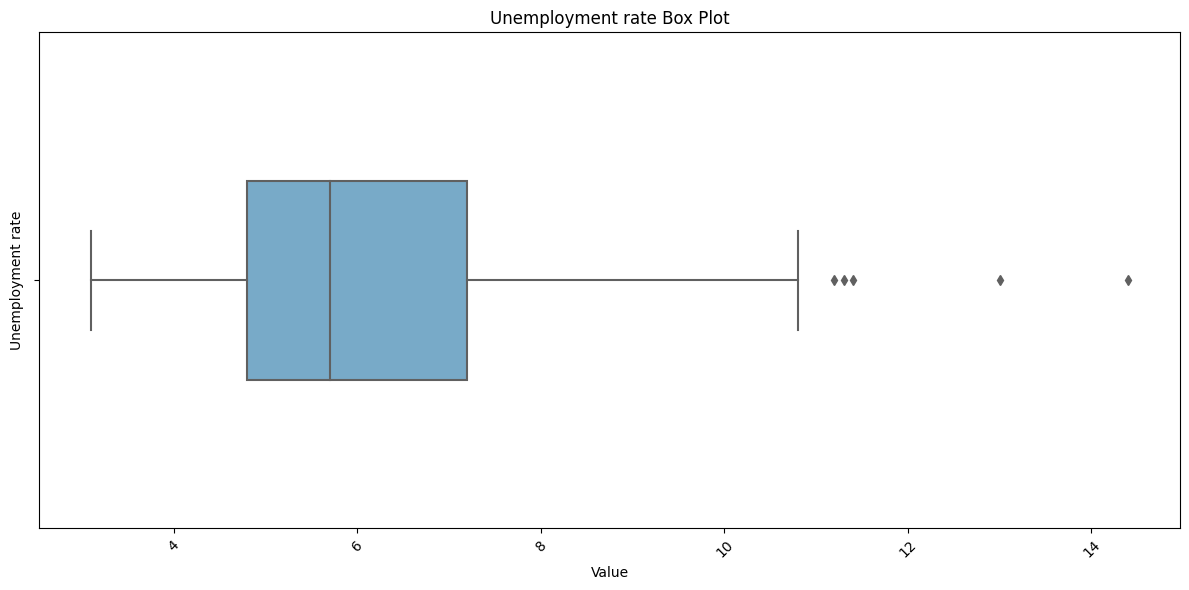

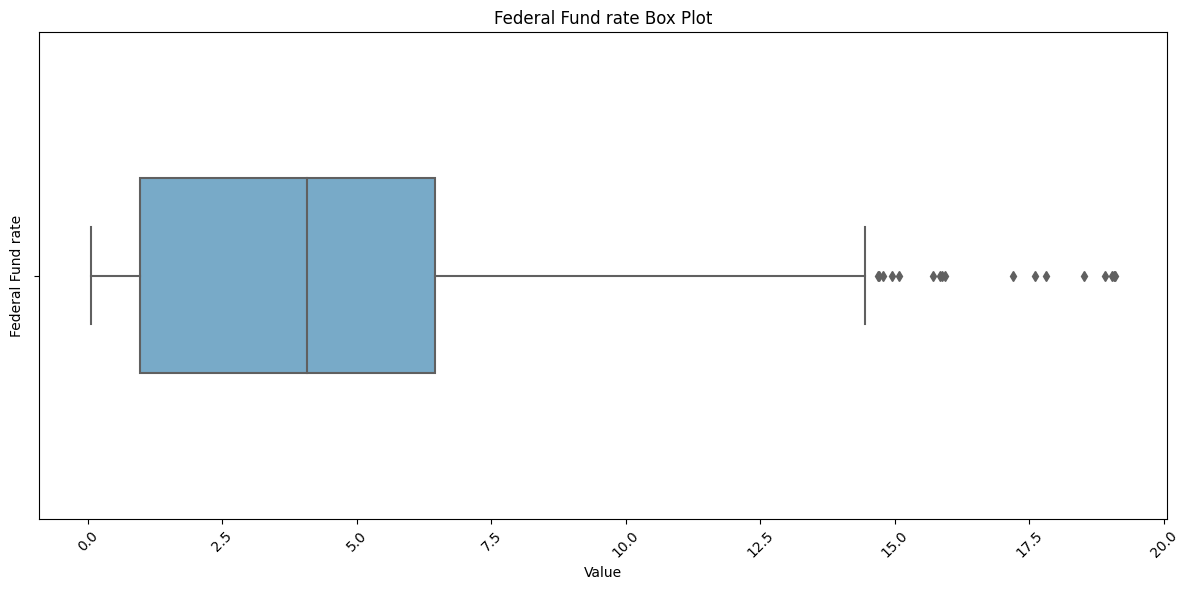

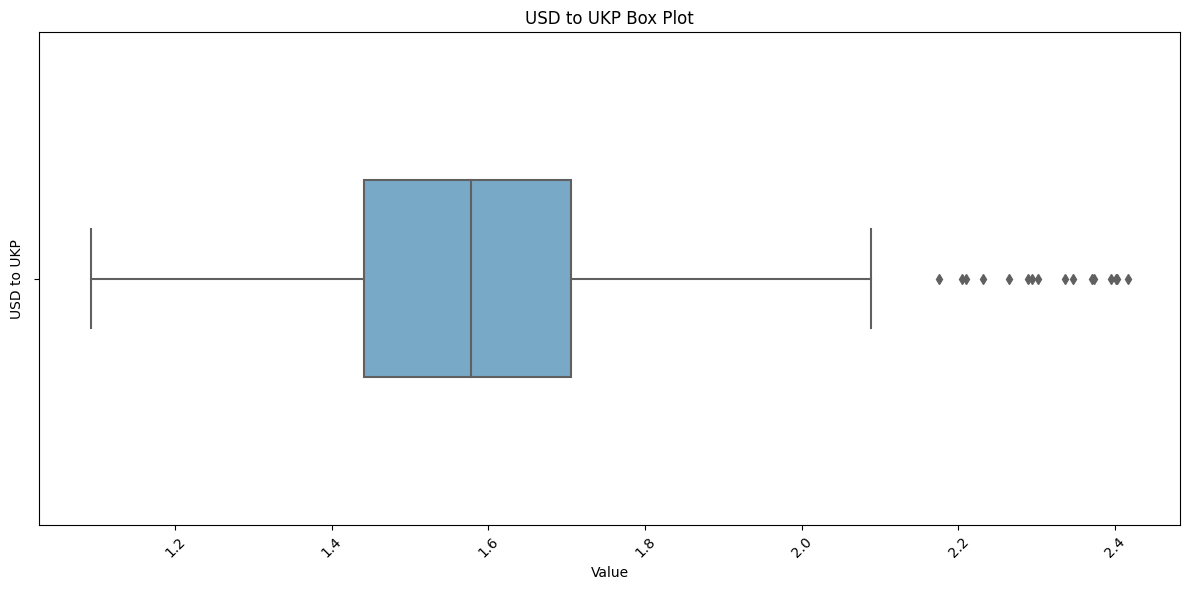

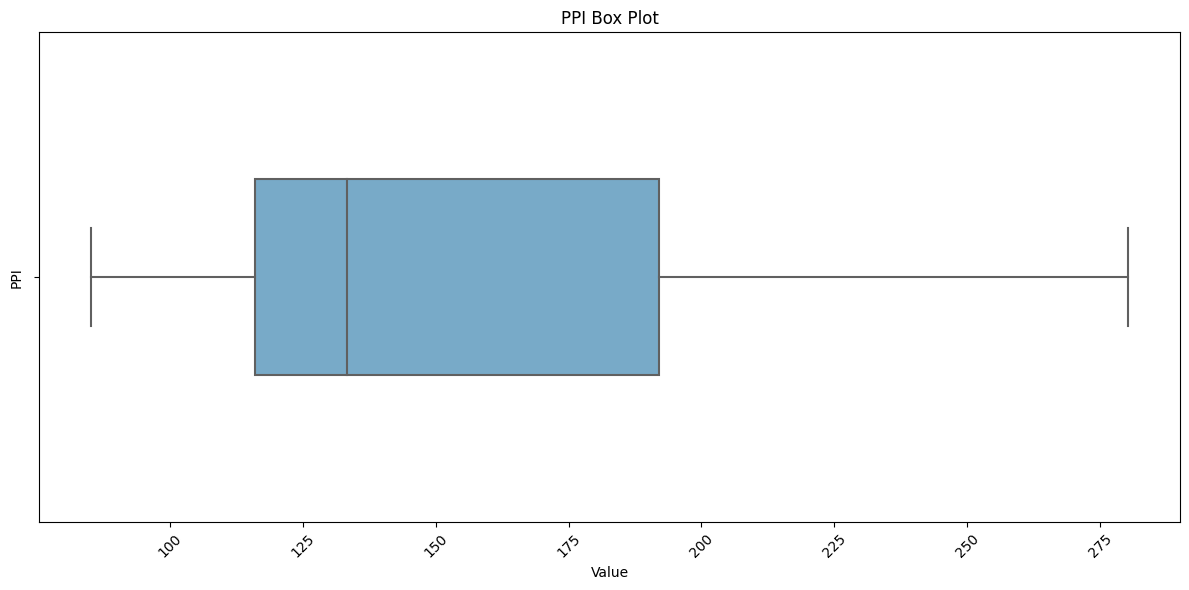

In [13]:
# Create an dataset to save all factors
factors_col = ['CPI', 'Unemployment rate', 'Federal Fund rate', 'USD to UKP', 'PPI']

# Set the Plot size
plt.figure(figsize=(12, 6))

# Plot Indivisual Box Plot for All Factors using Seaborn
for column in factors_col:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cpi[column] , palette="Blues", width=0.4)
    plt.xlabel('Value')
    plt.ylabel(f'{column}')
    plt.title(f'{column} Box Plot')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

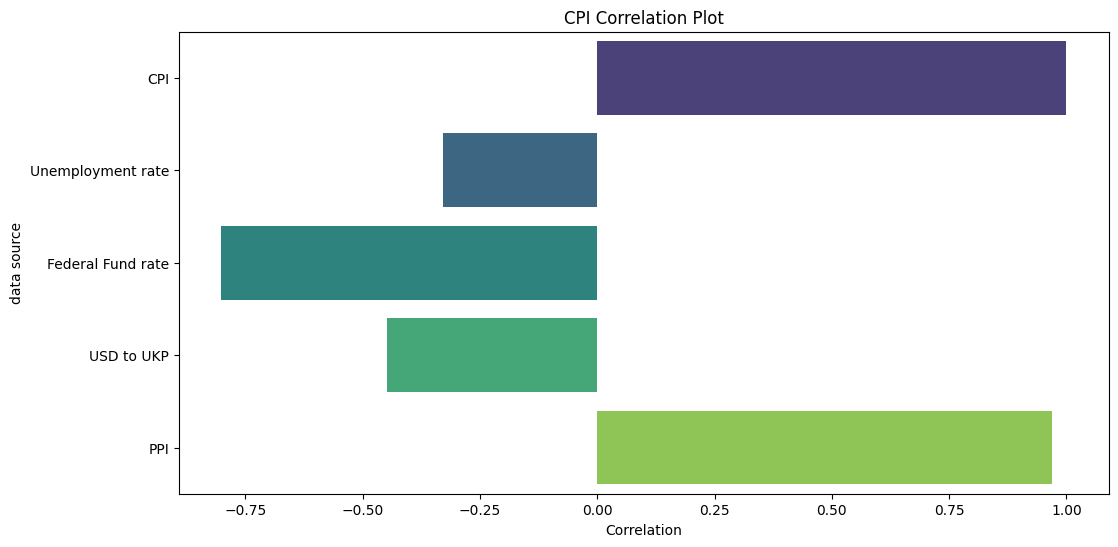

In [14]:
# Find and plot the correlation between CPI and factors

# Take the CPI column (3rd column)）
cpi_col = cpi['CPI']

# Take other column (start from Unemployment rate (4th) to PPI)
factors_col = cpi.iloc[:, 3:]

# Calculate the correlation between CPI and all factors perspectively
correlations = factors_col.corrwith(cpi_col)

# plot the correlation bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index,
            orient='h', palette='viridis')
plt.title('CPI Correlation Plot')
plt.xlabel('Correlation')
plt.ylabel('data source')
plt.show()


interval columns not set, guessing: ['CPI', 'Unemployment rate', 'Federal Fund rate', 'USD to UKP', 'PPI']


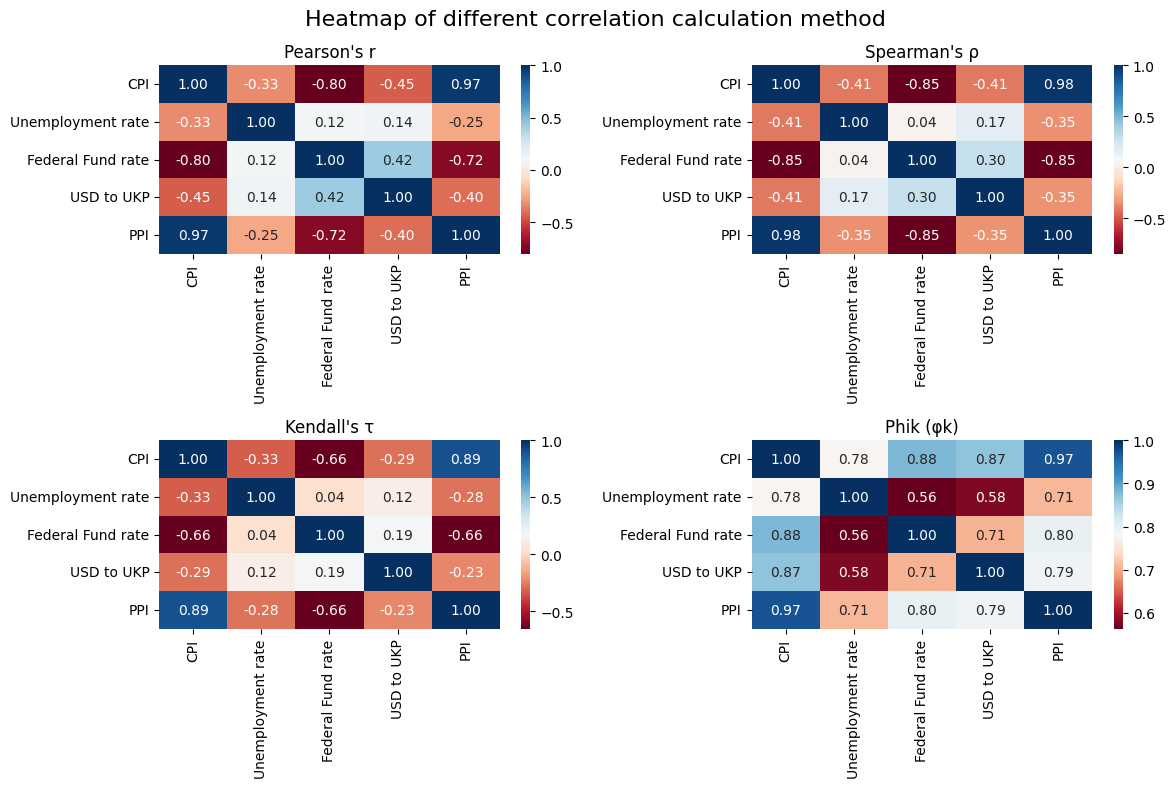

In [15]:
# Calculate the correlation between CPI and all factors
correlations = factors_col.corrwith(cpi_col)

# Turn it into correlation matrix
correlation_matrix = factors_col.corr()

# Calculate four different method of correlation
correlation_pearson = factors_col.corr()
correlation_spearman = factors_col.corr(method='spearman')
correlation_kendall = factors_col.corr(method='kendall')
correlation_phik = factors_col.phik_matrix()

# Plot the Correlation Heatmap
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Heatmap of different correlation calculation method', fontsize=16)

sns.heatmap(correlation_pearson, annot=True, cmap='RdBu', fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title("Pearson's r")

sns.heatmap(correlation_spearman, annot=True, cmap='RdBu', fmt=".2f", ax=axes[0, 1])
axes[0, 1].set_title("Spearman's ρ")

sns.heatmap(correlation_kendall, annot=True, cmap='RdBu', fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title("Kendall's τ")

sns.heatmap(correlation_phik, annot=True, cmap='RdBu', fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title("Phik (φk)")

plt.tight_layout()
plt.show()

In [16]:
# Calculate the Percentage Chage of CPI every month
cpi['CPI_Change'] = cpi['CPI'].iloc[3:].pct_change(periods = 1) * 100

# Find the Top 5 Interval that have the highest Percentage
n_top_intervals = 5
top_intervals = cpi.nlargest(n_top_intervals, 'CPI_Change')

# List the Top Five Percentage Change Value
top_cpi_change_values = top_intervals['CPI_Change'].tolist()

# Find the Time Interval of these Percentage）
top_intervals_time = top_intervals[['Year', 'Period']]

print("Top 5 CPI Percentage Change Values：")
print(top_cpi_change_values)

# Print the Highest Percentage and their relevant time Intrval
print("Top 5 CPI Percentage Change occur Time Interval ：")
print(top_intervals_time)

# Find all the other factor in the time period perspectively
for index, row in top_intervals_time.iterrows():
    year = row['Year']
    month = row['Period']
    selected_data = cpi[(cpi['Year'] == year) & (cpi['Period'] == month)]
    print(f"Occur Time : {year} {month} Data：")
    print(selected_data)


Top 5 CPI Percentage Change Values：
[1.3736075758819855, 1.3351379548562692, 1.2526096033403045, 1.2219959266802416, 1.103752759381904]
Top 5 CPI Percentage Change occur Time Interval ：
     Year Period
509  2022    M06
506  2022    M03
29   1982    M06
308  2005    M09
18   1981    M07
Occur Time : 2022 M06 Data：
     Year Period     Label      CPI  Unemployment rate  Federal Fund rate  \
509  2022    M06  2022 Jun  296.311                3.8               1.21   

     USD to UKP      PPI  CPI_Change  
509       1.232  280.251    1.373608  
Occur Time : 2022 M03 Data：
     Year Period     Label      CPI  Unemployment rate  Federal Fund rate  \
506  2022    M03  2022 Mar  287.504                3.8                0.2   

     USD to UKP      PPI  CPI_Change  
506      1.3168  260.014    1.335138  
Occur Time : 1982 M06 Data：
    Year Period     Label   CPI  Unemployment rate  Federal Fund rate  \
29  1982    M06  1982 Jun  97.0                9.8              14.15   

    USD to UKP 

<Figure size 640x480 with 0 Axes>

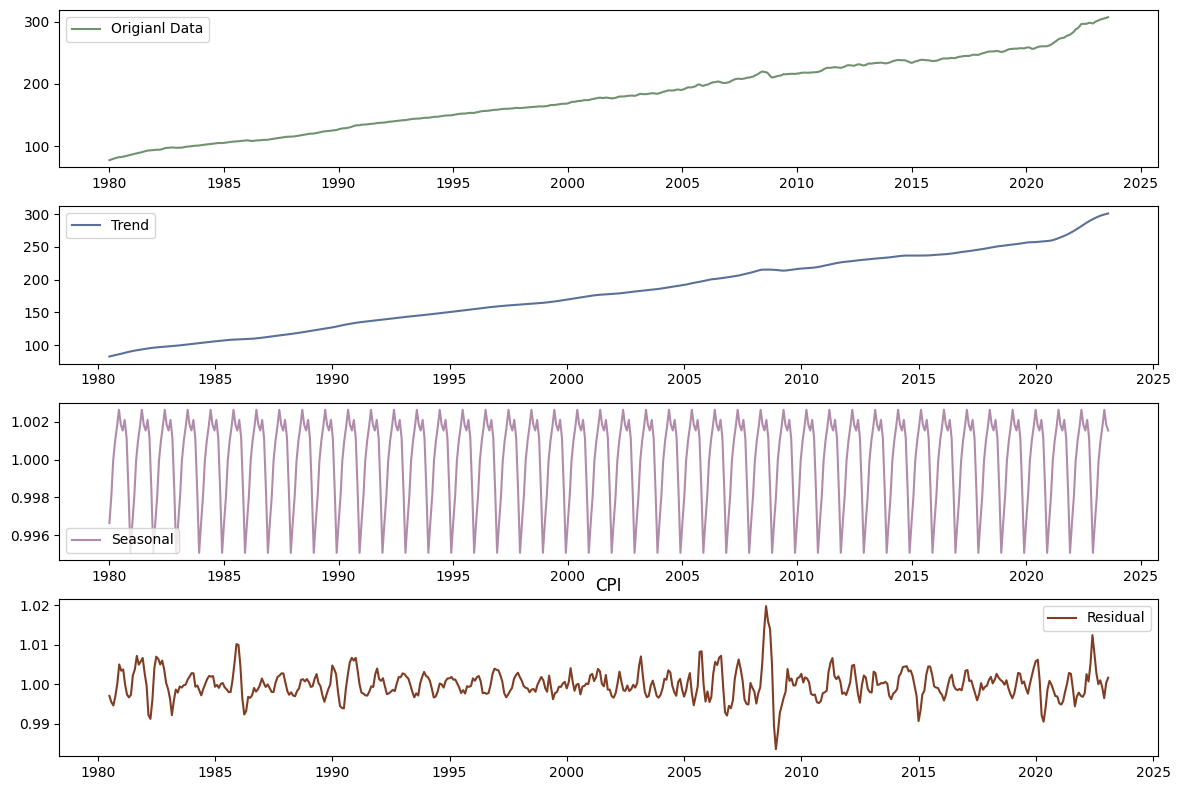

<Figure size 640x480 with 0 Axes>

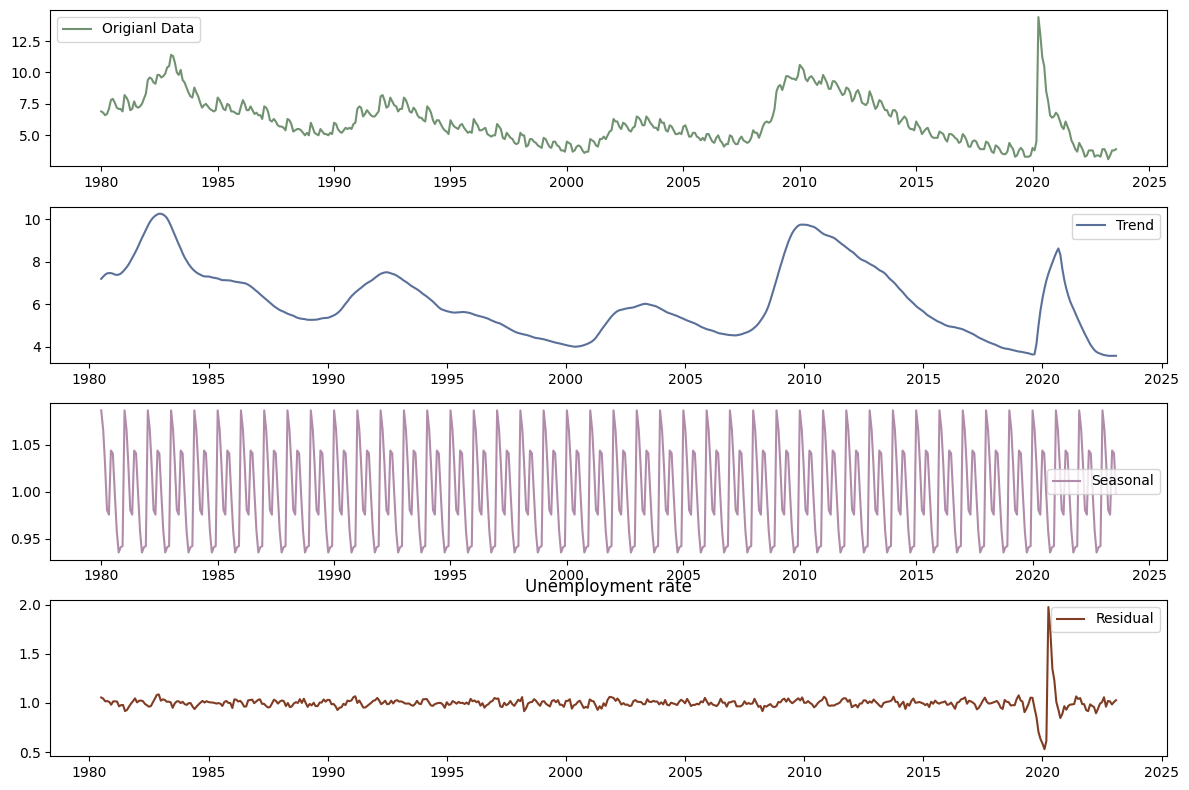

<Figure size 640x480 with 0 Axes>

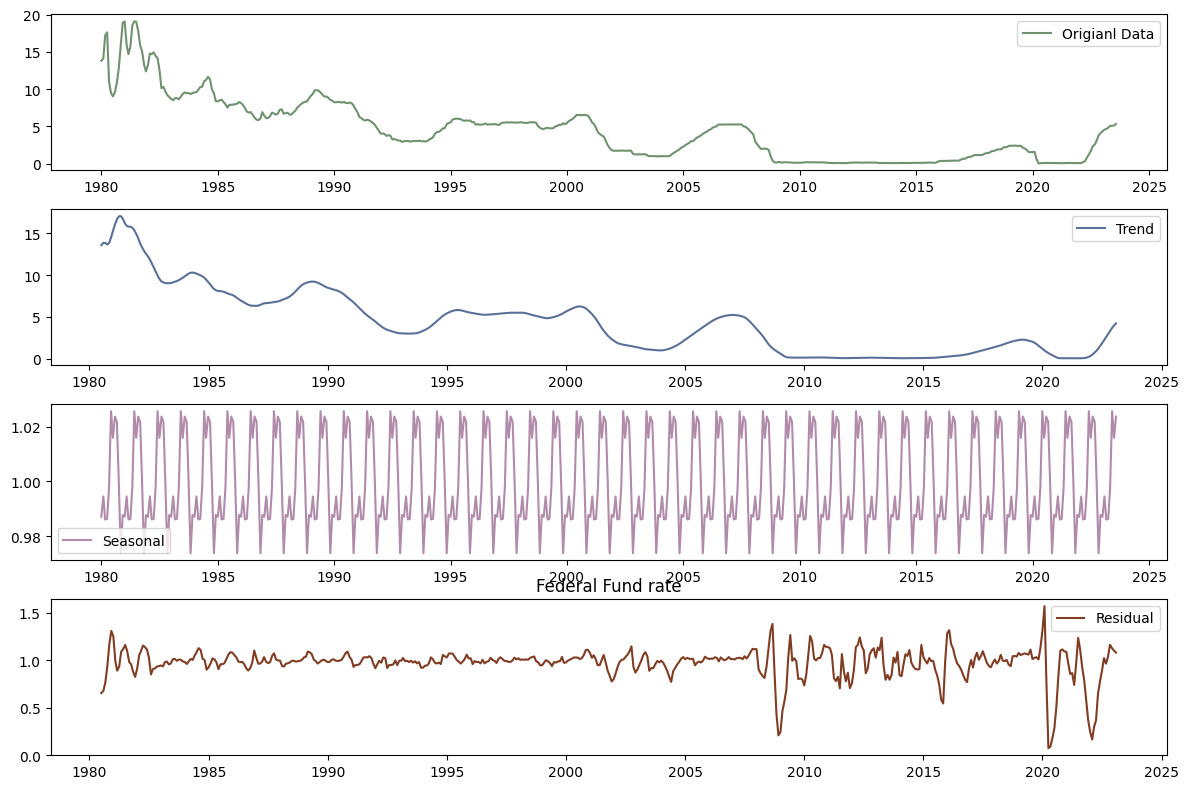

<Figure size 640x480 with 0 Axes>

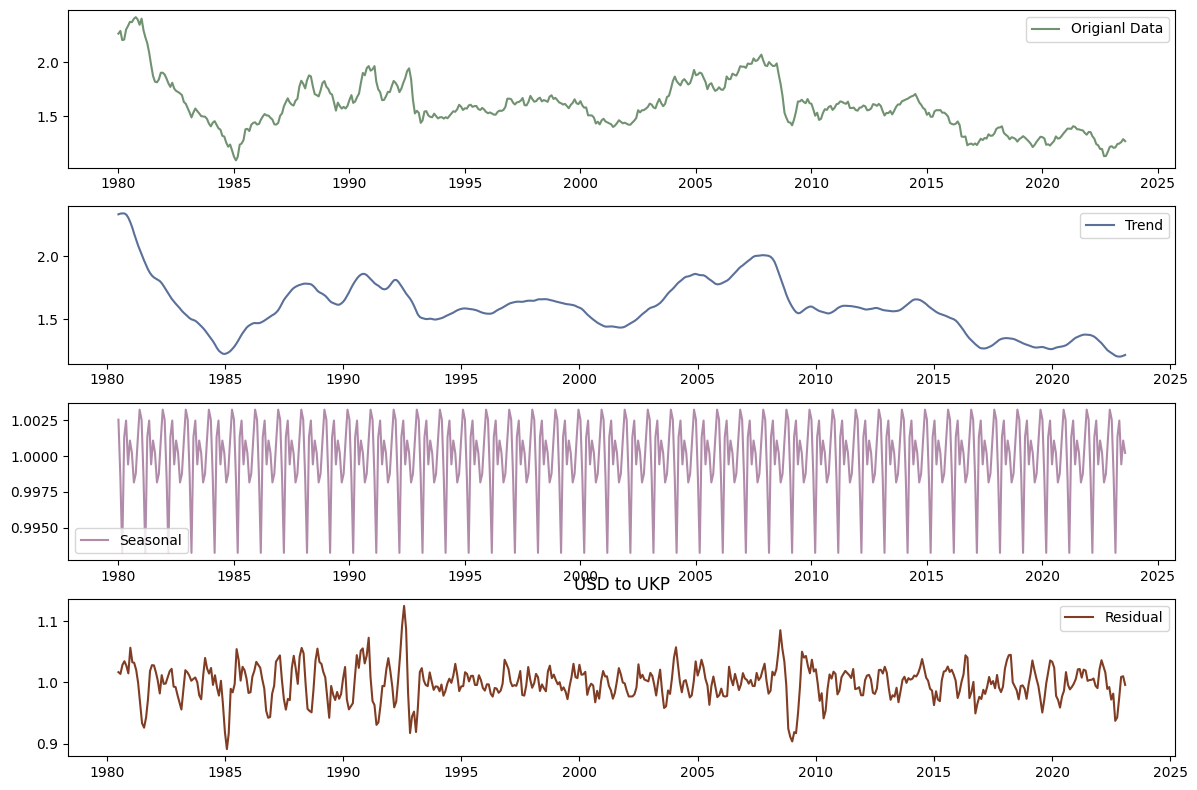

<Figure size 640x480 with 0 Axes>

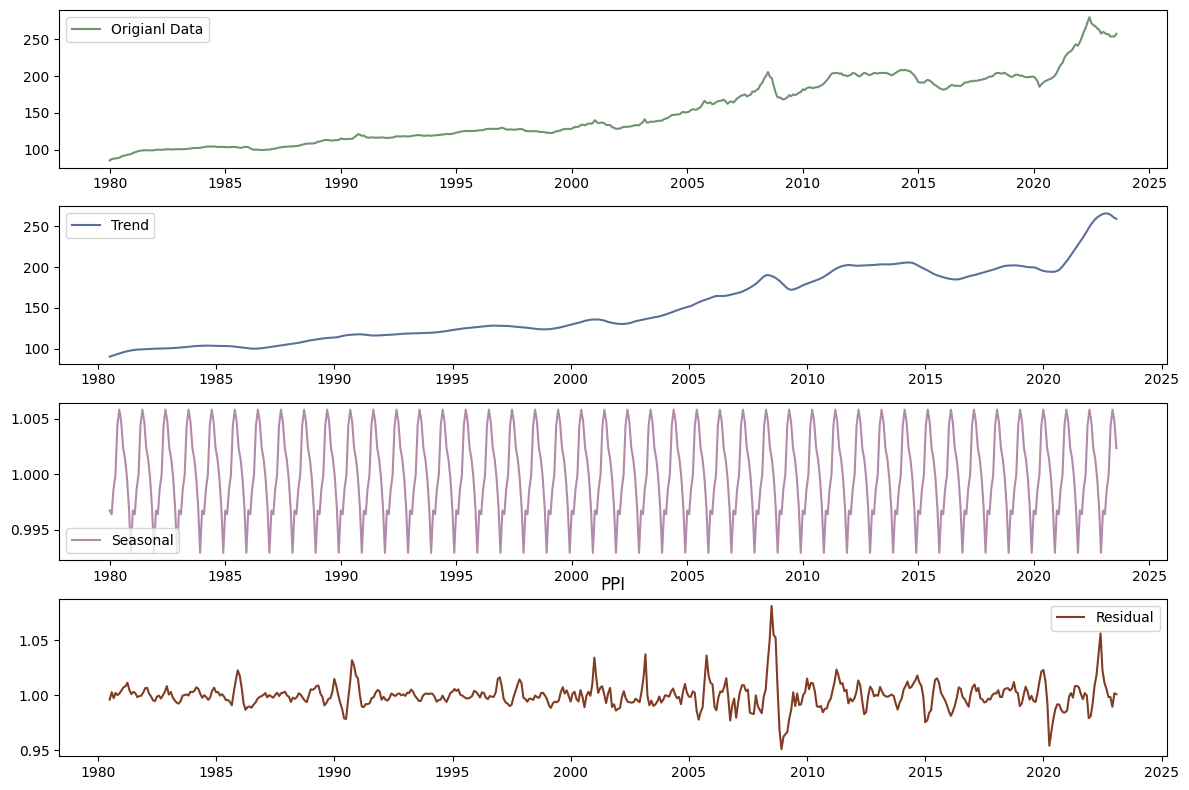

In [17]:
# Pick the Column that used to Find Seasonal effect
factors_col = ['CPI', 'Unemployment rate', 'Federal Fund rate', 'USD to UKP', 'PPI']

# Transfer Year and Month
def convert_to_datetime(row):
    year = int(row['Year'])
    period = row['Period']
    ## Pick part of the 'Peroid' section to obtain month
    month = int(period[1:])
    return pd.Timestamp(year=year, month=month, day=1)

cpi['Date'] = cpi.apply(convert_to_datetime, axis=1)
cpi.set_index('Date', inplace=True)


# Deseasonal By using statsmodels
for column in factors_col:
    # Take the 3rd column as the time series
    time_series_data = cpi[column]

    # Apply Seasonal Decompose
    result = sm.tsa.seasonal_decompose(time_series_data, model='multiplicative')

    # Adjust the space between subplot
    plt.subplots_adjust(hspace=3)

    # Set the Plot size
    plt.figure(figsize=(12, 8))

    # Reslut of the Deseaonalizing
    plt.subplot(411)
    plt.plot(time_series_data, label='Origianl Data', color = '#719271')
    plt.legend()

    plt.subplot(412)
    plt.plot(result.trend, label='Trend', color ='#5b7099')
    plt.legend()

    plt.subplot(413)
    plt.plot(result.seasonal, label='Seasonal', color = '#b18baa')
    plt.legend()

    plt.subplot(414)
    plt.plot(result.resid, label='Residual', color = '#803d23')
    plt.legend()

    plt.tight_layout()
    plt.title(f'{column}')
    plt.show()

In [18]:
# Create two data frame to save the deseasonalizing result of two method
deseason_1_df = pd.DataFrame()
deseason_2_df = pd.DataFrame()

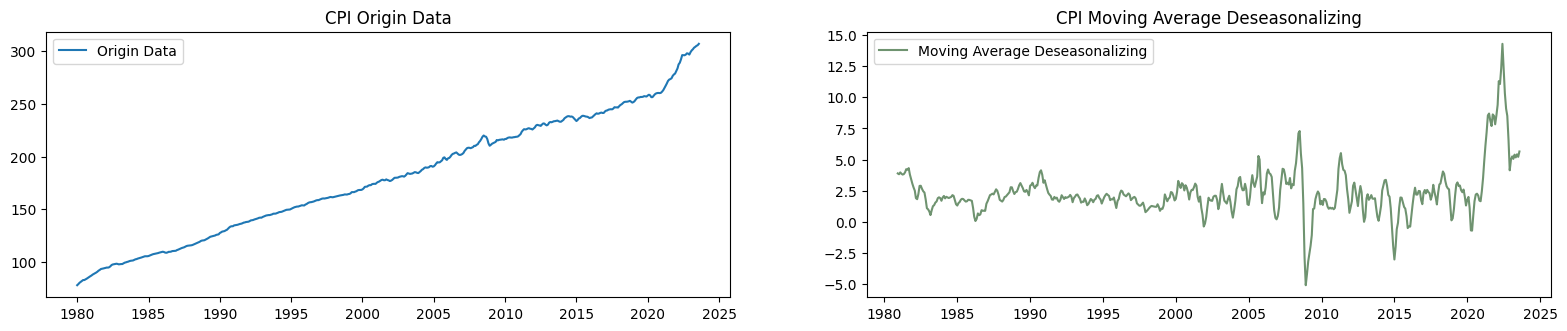

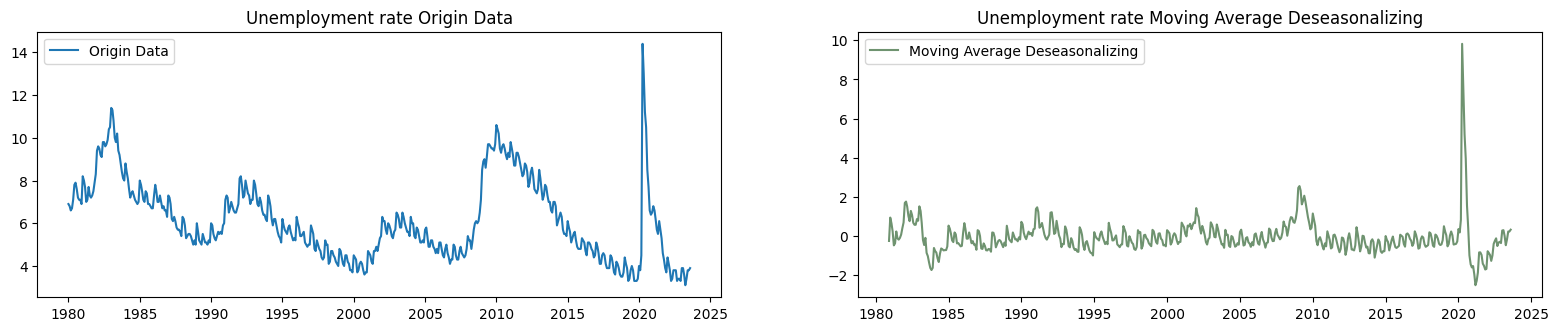

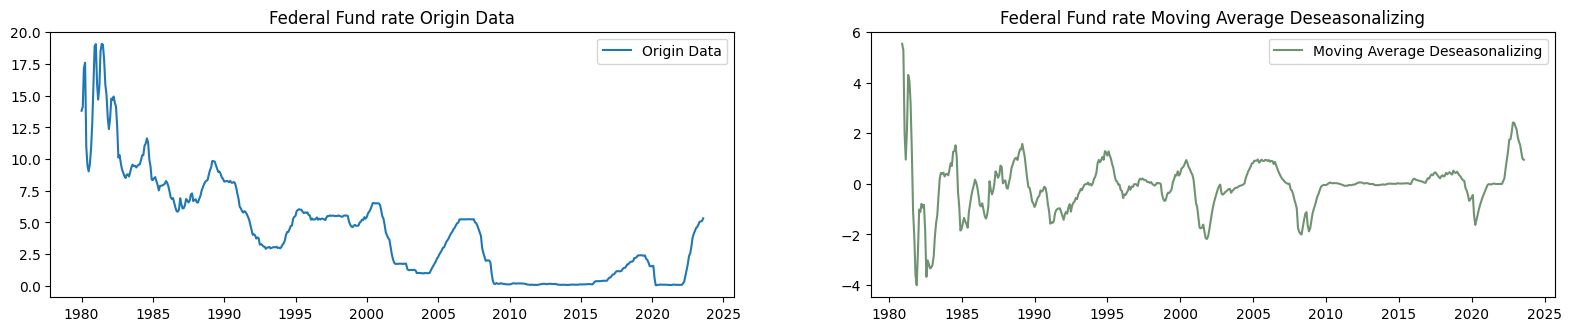

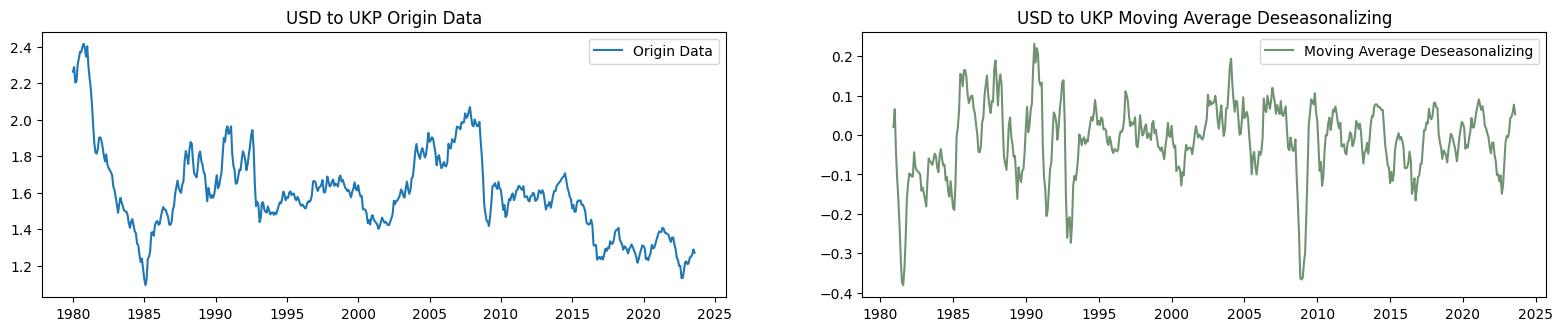

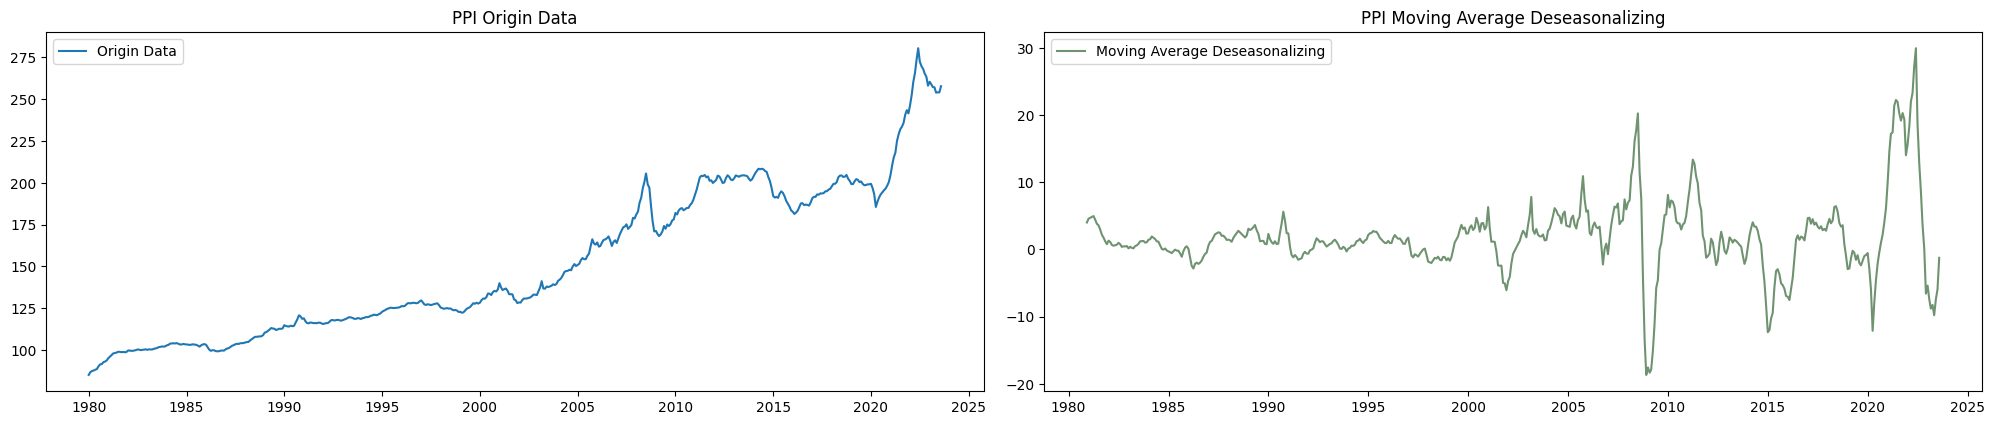

In [19]:
# Deseasonalizing Method 1 : Moving Average

for i, column in enumerate(factors_col):

    plt.figure(figsize=(30,20))

    # Take the 3rd column as the time series unit
    time_series_data = cpi[column]

    # Deseasonalizing
    result = sm.tsa.seasonal_decompose(time_series_data, model='multiplicative')

    # Moving Average (calculate 12 month moving average)
    moving_avg = time_series_data.rolling(window=12).mean()
    deseason_1 = time_series_data - moving_avg

    deseason_1_df[column] = deseason_1

    # Plot Deseasonalizing Result
    plt.subplot(len(factors_col), 3, i * 3 + 1)
    plt.plot(time_series_data, label='Origin Data')
    plt.title(f'{column} Origin Data')
    plt.legend()

    plt.subplot(len(factors_col), 3, i * 3 + 2)
    plt.plot(deseason_1, label='Moving Average Deseasonalizing', color = '#6f9370')
    plt.title(f'{column} Moving Average Deseasonalizing')
    plt.legend()


plt.tight_layout()
plt.show()

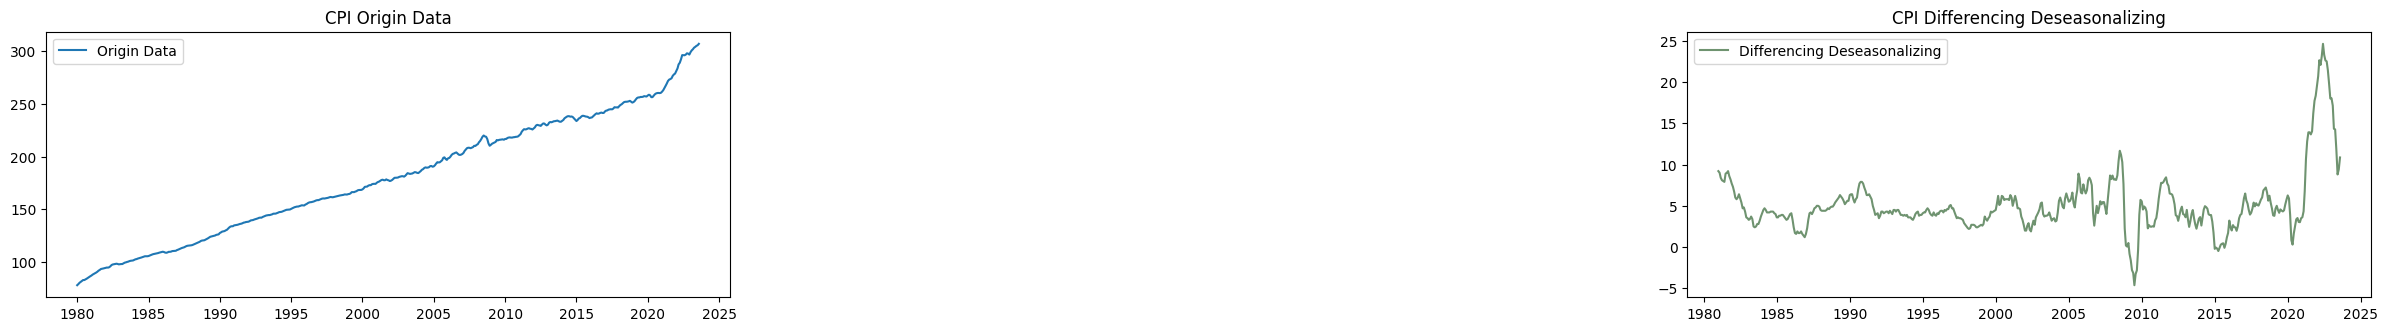

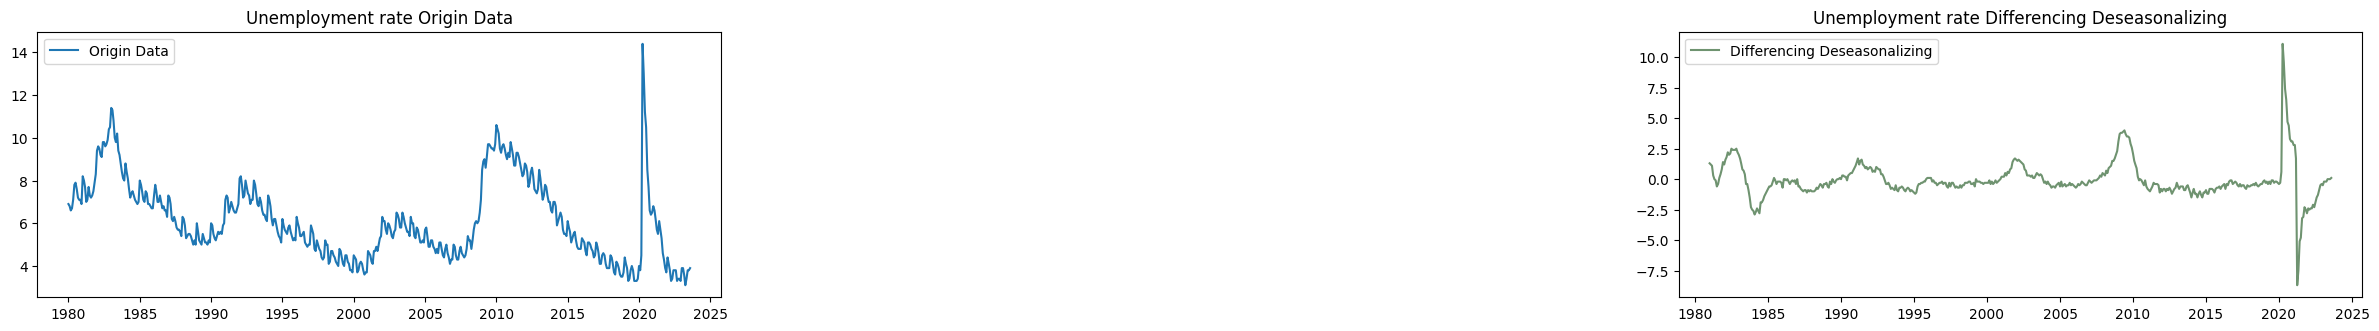

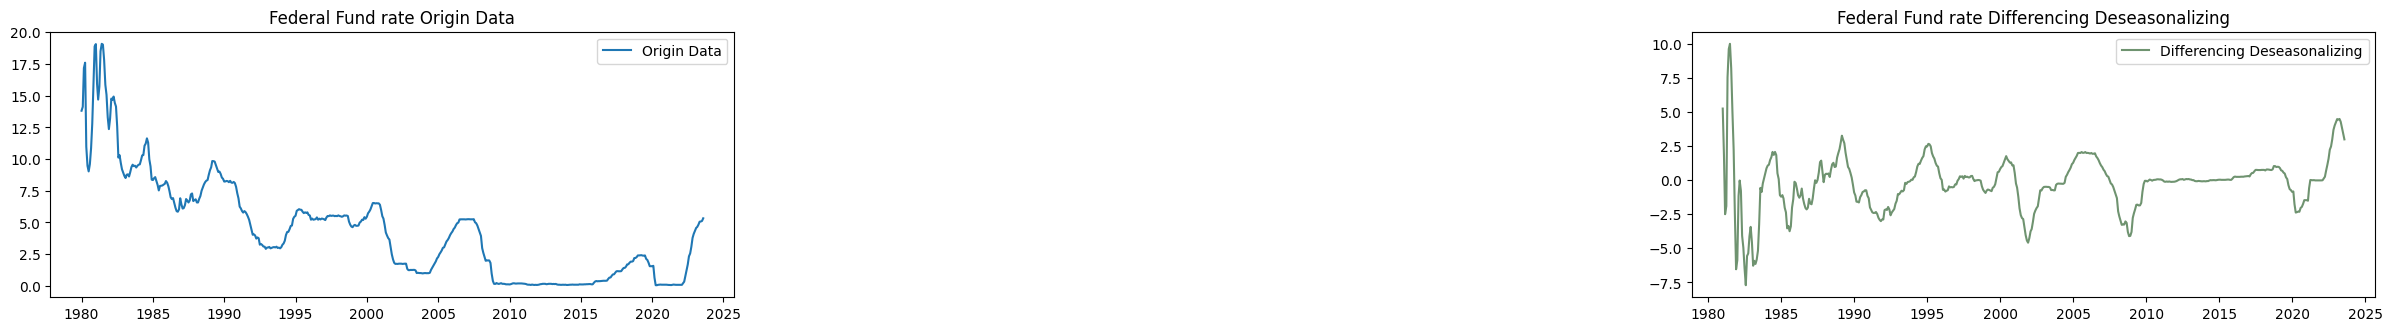

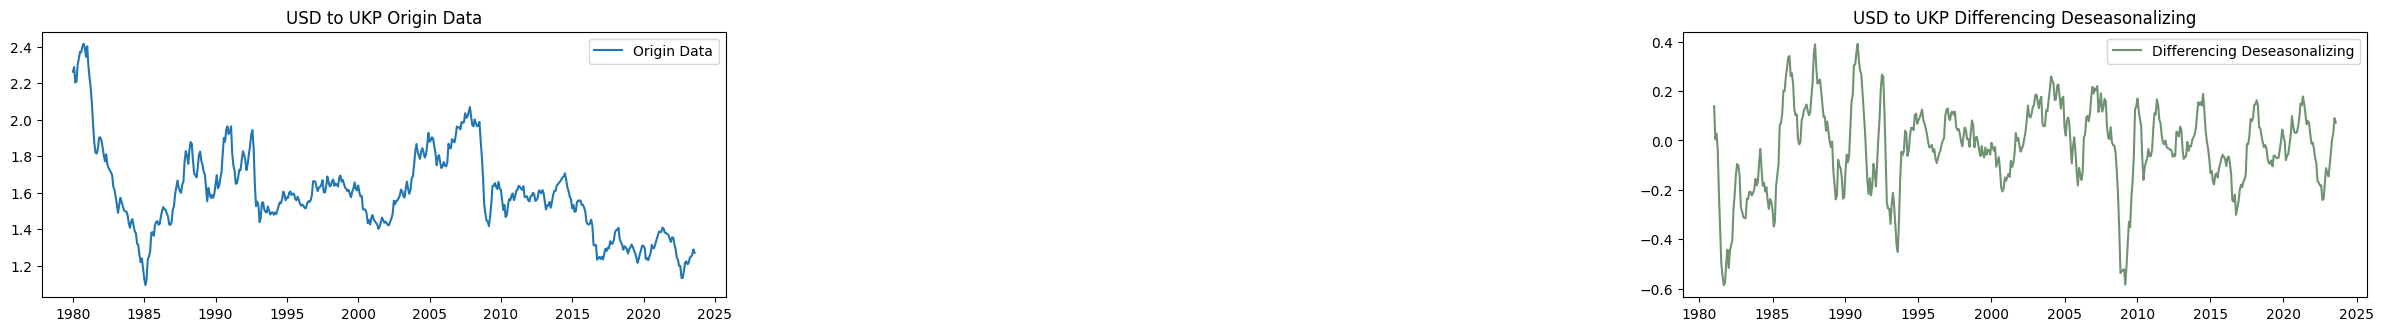

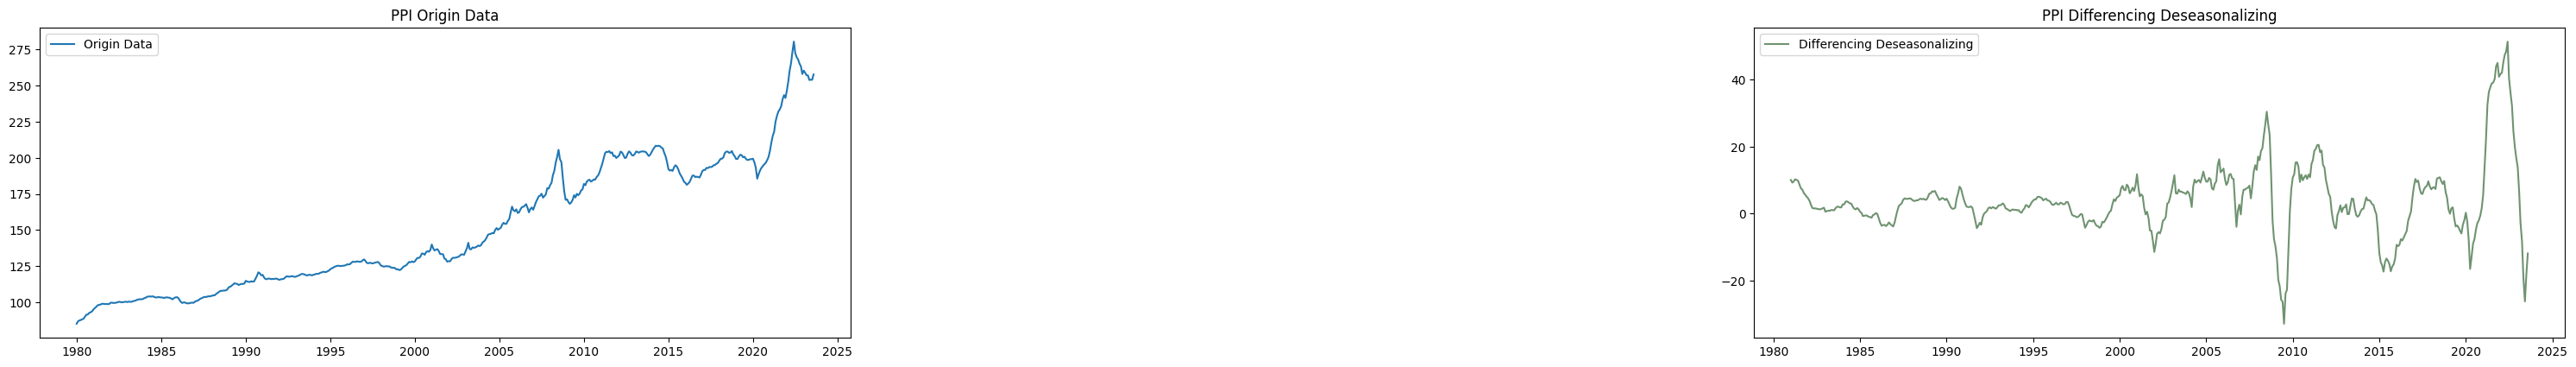

In [20]:
# Deseasonalizing Method 2 : Differencing

for i, column in enumerate(factors_col):

    plt.figure(figsize=(30,20))

    # Take the 3rd column as the time series unit
    time_series_data = cpi[column]

    # Deseasonalizing
    result = sm.tsa.seasonal_decompose(time_series_data, model='multiplicative')

    # Differencing
    deseason_2 = time_series_data.diff(periods=12)

    deseason_2_df[column] = deseason_2

    # Plot Deseasonalizing Result
    plt.subplot(len(factors_col), 3, i * 3 + 1)
    plt.plot(time_series_data, label='Origin Data')
    plt.title(f'{column} Origin Data')
    plt.legend()

    plt.subplot(len(factors_col), 3, i * 3 + 3)
    plt.plot(deseason_2, label='Differencing Deseasonalizing', color = '#6f9370')
    plt.title(f'{column} Differencing Deseasonalizing')
    plt.legend()


plt.tight_layout()
plt.show()

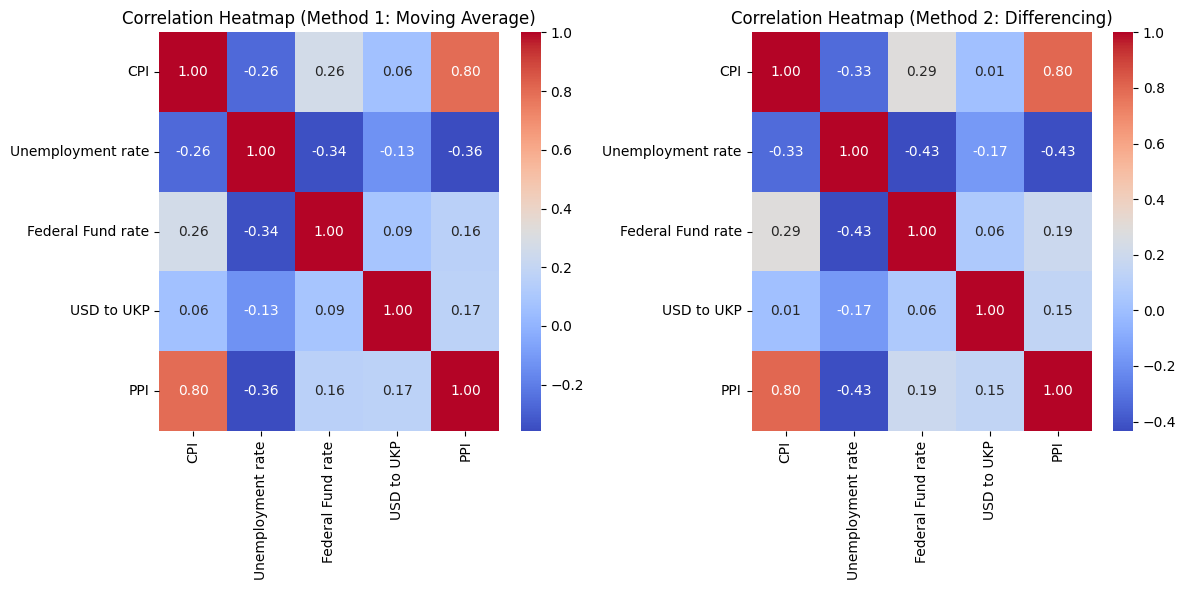

In [21]:
# Plot Correlation Heatmap after deseasonalizing

correlation1 = deseason_1_df.corr()
correlation2 = deseason_2_df.corr()


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(correlation1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Method 1: Moving Average)')

plt.subplot(1, 2, 2)
sns.heatmap(correlation2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Method 2: Differencing)')

plt.tight_layout()
plt.show()